In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
import matplotlib.pyplot as plt


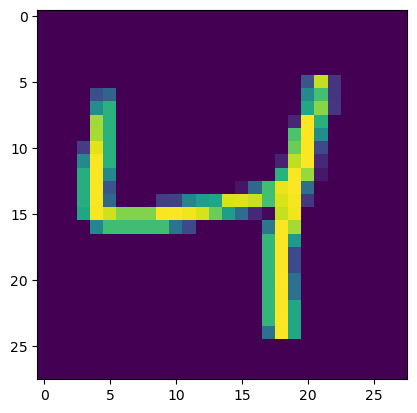

In [8]:
plt.imshow(X_train[2])

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.1514 - val_accuracy: 0.9753
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.1615 - val_accuracy: 0.9758
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.1638 - val_accuracy: 0.9747
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.1743 - val_accuracy: 0.9740
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.1689 - val_accuracy: 0.9762
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.1655 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.1801 - val_accuracy:

In [38]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [39]:
y_pred = y_prob.argmax(axis = 1)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9775

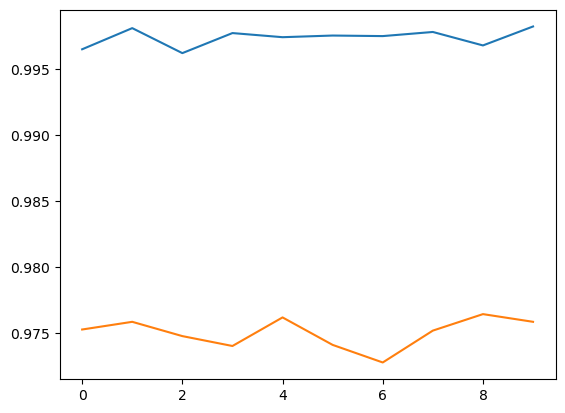

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


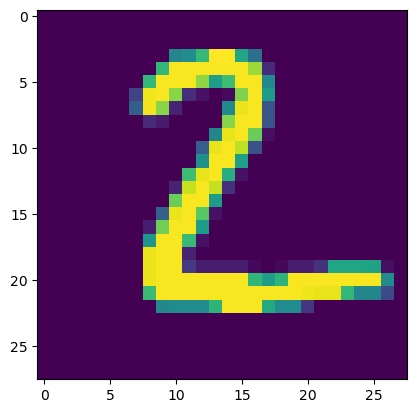

In [48]:
plt.imshow(X_test[1])

In [49]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 24ms/step


array([2], dtype=int64)